In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cairosvg

In [2]:
lichess_img_path = "/Users/sashanktirumala/Desktop/chess_vm.png"
lichess_img = Image.open(lichess_img_path)
pts= [(200, 190), (720, 190), (720, 710), (200, 710)]
min_x = min([pts[0][0], pts[1][0], pts[2][0], pts[3][0]])
max_x = max([pts[0][0], pts[1][0], pts[2][0], pts[3][0]])
min_y = min([pts[0][1], pts[1][1], pts[2][1], pts[3][1]])
max_y = max([pts[0][1], pts[1][1], pts[2][1], pts[3][1]])
dist1 = ((pts[0][0] - pts[1][0])**2 +  (pts[0][1] - pts[1][1])**2)**0.5
dist2 = ((pts[1][0] - pts[2][0])**2 +  (pts[1][1] - pts[2][1])**2)**0.5
dist3 = ((pts[2][0] - pts[3][0])**2 +  (pts[2][1] - pts[3][1])**2)**0.5
dist4 = ((pts[3][0] - pts[0][0])**2 +  (pts[3][1] - pts[0][1])**2)**0.5
assert dist1 == dist2 ==dist3 == dist4
dist = dist1


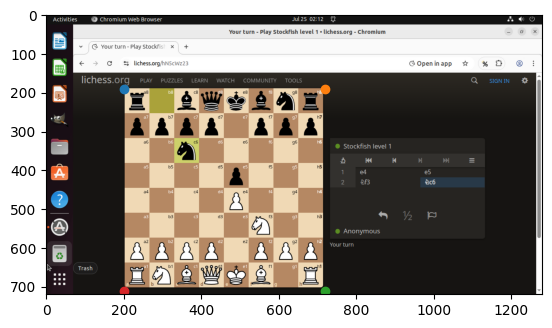

In [3]:
plt.imshow(lichess_img)
plt.scatter(pts[0][0], pts[0][1])
plt.scatter(pts[1][0], pts[1][1])
plt.scatter(pts[2][0], pts[2][1])
plt.scatter(pts[3][0], pts[3][1])
plt.show()

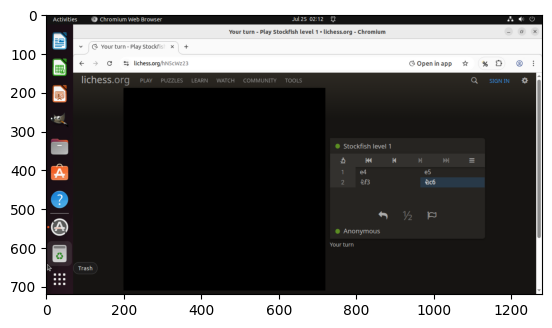

In [4]:
arr = np.array(lichess_img)
arr.shape
height, width, c = arr.shape
for y in range(height):
    for x in range(width):
        if y < min_y:
            continue
        if y > max_y:
            continue
        if x >max_x:
            continue
        if x < min_x:
            continue
        arr[y][x] = [0.0,0.0,0.0]

plt.imshow(arr)


In [5]:
import io
svg_img_path = "/Users/sashanktirumala/projects/data/test_dataset/game_0/move_0.svg"
board_png_bytes = cairosvg.svg2png(
    url=svg_img_path,
    output_width=dist,
    output_height=dist
)
board_img = Image.open(io.BytesIO(png_bytes))
board_img_array = np.array(board_img)
arr = np.array(lichess_img)
overlay_img = arr.copy()
overlay_img[min_y:max_y, min_x:max_x] = board_img_array
# arr.shape
# height, width, c = arr.shape
# for y in range(height):
#     for x in range(width):
#         if y < min_y or y >= max_y or x >=max_x or x < min_x :
#             continue
#         arr[y][x] = img_array[y-min_y, x-min_x]

plt.imshow(overlay_img)

URLError: <urlopen error [Errno 2] No such file or directory: '/Users/sashanktirumala/projects/data/test_dataset/game_0/move_0.svg'>

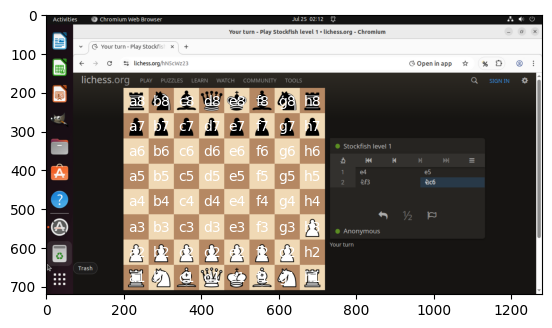

In [60]:
plt.imshow(arr)
# plt.scatter(65/2,65/2)
# plt.scatter(65*15/2, 65*3/2)
multiples = np.array([1,3,5,7,9,11,13,15])
const = dist/8
def coord_to_xycoord(coord, offset, diff_mult):
    coord_dict = {"a":0,"b":1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7}
    letter = coord[0]
    num = 8 - int(coord[1])
    coordinate = np.array((offset*diff_mult[coord_dict[letter]]/2, offset*diff_mult[num]/2))
    return coordinate

letters = "abcdefgh"
for i in range(8):
    for j in range(8):
        letter = letters[i]
        number = j+1
        coordinate = f"{letter}{number}"
        xy_coord = coord_to_xycoord(coord=coordinate, offset=dist/8, diff_mult=multiples)
        xy_coord[0] += min_y+10
        xy_coord[1] += min_x-10
        plt.text(xy_coord[0], xy_coord[1], coordinate, ha='center', va='center', color="white")


# coord1 = coord_to_xycoord(coord="b8", offset=dist/8, diff_mult=multiples)
# print(coord1)
# plt.scatter(coord1[0], coord1[1])
plt.show()

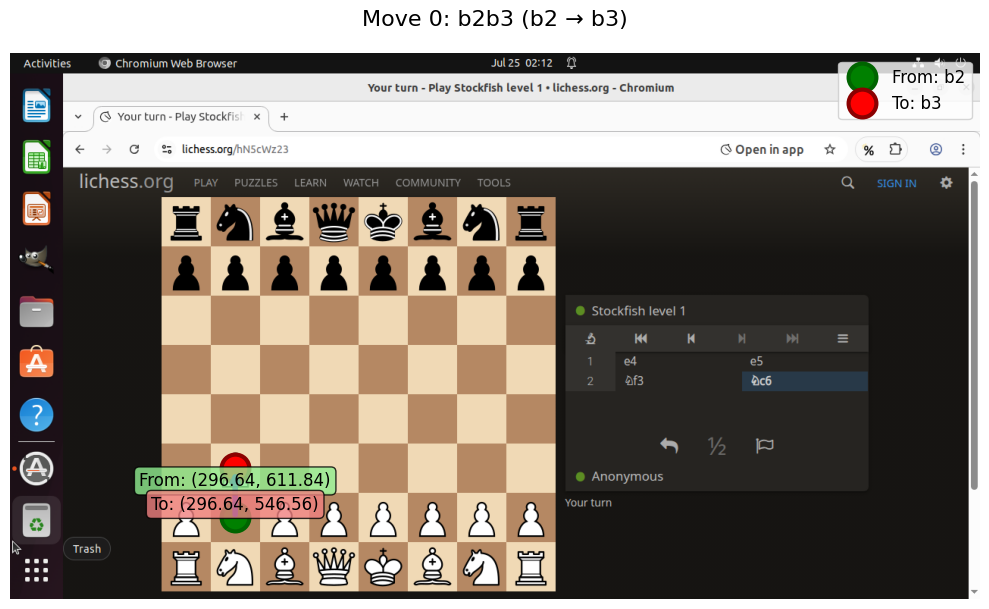

In [10]:
# Read dataset
import json
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

def visualize_move(move_number:int, json_file:Path):
    """
    Visualize a single chess move with from/to coordinates marked.
    
    Args:
        move_number (int): The move number to visualize (default: 0)
        json_file (str): Path to the JSON file containing move data
    """
    
    # Load the moves data
    with open(json_file, 'r') as f:
        moves = json.load(f)
    
    # Find the specific move
    move = moves[move_number]
    
    # Load and display the image
    image_path = json_file.parent / move['image']
    img = Image.open(image_path)
    img_arr = np.array(img)
    height, width, _ = img_arr.shape
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    
    # Extract coordinates
    from_x, from_y = move['from_coords']
    to_x, to_y = move['to_coords']

    from_x =  from_x * height/1000
    to_x = to_x * height/1000

    from_y = from_y * width/1000
    to_y = to_y * width/1000
    
    # Plot the move coordinates
    # From square (green)
    plt.plot(from_x, from_y, 'go', markersize=20, markeredgecolor='darkgreen', 
             markeredgewidth=3, label=f"From: {move['from_square']}")
    
    # To square (red)
    plt.plot(to_x, to_y, 'ro', markersize=20, markeredgecolor='darkred', 
             markeredgewidth=3, label=f"To: {move['to_square']}")
    
    # Draw arrow from -> to
    plt.annotate('', xy=(to_x, to_y), xytext=(from_x, from_y),
                arrowprops=dict(arrowstyle='->', color='blue', lw=4, alpha=0.8))
    
    # Add coordinate text
    plt.text(from_x, from_y-60, f"From: ({from_x}, {from_y})", ha='center', va='top', 
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))
    plt.text(to_x, to_y+60, f"To: ({to_x}, {to_y})", ha='center', va='bottom', 
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))
    
    # Set title
    plt.title(f"Move {move['move_number']}: {move['uci']} ({move['from_square']} → {move['to_square']})", 
             fontsize=16, pad=20)
    
    # Add legend
    plt.legend(loc='upper right', fontsize=12)
    
    # Remove axes for cleaner look
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage - visualize move 0
json_file= Path("/Users/sashanktirumala/projects/data/test_dataset3/game_0/moves.json")
visualize_move(0, json_file=json_file)